# Holiday packages dataset  🎒✈️

Dataset from [Kaggle](https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Travel.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.Gender.value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

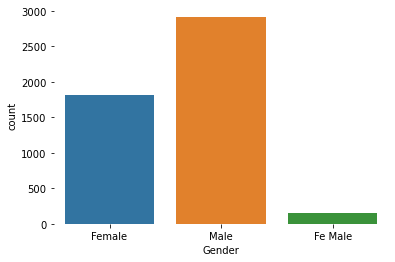

In [5]:
sns.countplot(x = "Gender", data = df)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

Not sure what Fe Male is, so delete that from df.

In [6]:
df = df.loc[(df['Gender']!="Fe Male")]

In [7]:
df.Gender.value_counts()

Male      2916
Female    1817
Name: Gender, dtype: int64

## Who travels more?

In [8]:
pd.pivot_table(data = df, index = 'Occupation',
              columns = ['MaritalStatus', 'Gender'],
               values = 'NumberOfTrips',
              aggfunc = 'mean')

MaritalStatus   Divorced             Married              Single            \
Gender            Female      Male    Female      Male    Female      Male   
Occupation                                                                   
Free Lancer          NaN       NaN       NaN       NaN       NaN  7.500000   
Large Business  2.555556  3.851064  3.038462  3.643478  2.729730  4.392857   
Salaried        2.943182  3.348485  3.280098  3.303965  3.055276  2.801762   
Small Business  3.689024  2.982456  3.408269  3.247475  2.594203  2.867841   

MaritalStatus  Unmarried            
Gender            Female      Male  
Occupation                          
Free Lancer          NaN       NaN  
Large Business  3.928571  3.277778  
Salaried        3.269231  3.293532  
Small Business  3.220339  3.133803

I'm just cheking here if this pivot table is doing what I want: getting the average number of trips per group

In [9]:
df_divorced_women = df[(df.Gender == 'Female') &
                     (df.MaritalStatus == 'Divorced') & 
                     (df.Occupation == 'Large Business')]
df_divorced_women.NumberOfTrips.mean()

2.5555555555555554

In [10]:
df_single_men = df[(df.Gender == 'Male') &
                     (df.MaritalStatus == 'Single') & 
                     (df.Occupation == 'Large Business')]
df_single_men.NumberOfTrips.mean()

4.392857142857143

Why NaN? 

In [11]:
df.loc[(df['Occupation']=="Free Lancer")]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
2446,202446,1,38.0,Self Enquiry,1,9.0,Free Lancer,Male,4,5.0,Basic,3.0,Single,8.0,1,3,0,1.0,Executive,20768.0


Because there are only two Freelancers in the dataset and they are Male!!

I'll now create a dataset with the columns of interest to answer my question

In [12]:
question1 = df[['Gender', 'Occupation', 'MaritalStatus', 'NumberOfTrips']]

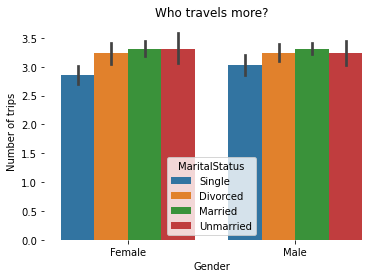

In [13]:
sns.barplot(x="Gender", y="NumberOfTrips",
            hue = 'MaritalStatus',
             data=question1).set(title='Who travels more?',
                          xlabel = 'Gender', ylabel = 'Number of trips')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

It looks like Single people travel a bit less...

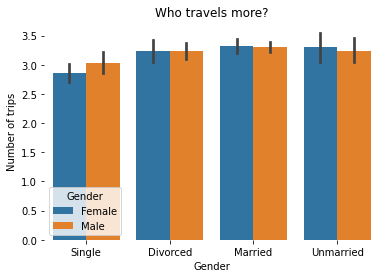

In [14]:
sns.barplot(x='MaritalStatus', y="NumberOfTrips",
            hue = 'Gender',
             data=question1).set(title='Who travels more?',
                          xlabel = 'Gender', ylabel = 'Number of trips')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

especially single women travel less...

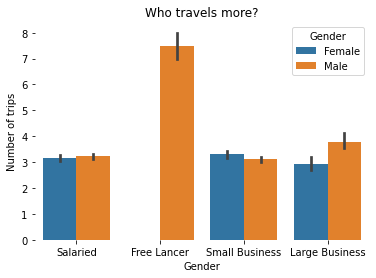

In [15]:
sns.barplot(x='Occupation', y="NumberOfTrips",
            hue = 'Gender',
             data=question1).set(title='Who travels more?',
                          xlabel = 'Gender', ylabel = 'Number of trips')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

we only have data for 2 freelancers, let's check how many datapoints we have for the other occupations...

In [16]:
question1.Occupation.value_counts()

Salaried          2303
Small Business    2007
Large Business     421
Free Lancer          2
Name: Occupation, dtype: int64

Ok, so I think it's best if we remove the 2 freelancers

In [17]:
question1 = question1.loc[(df['Occupation']!="Free Lancer")]

something is not adding up - the pivot table above tells us that single men travel more in average...whereas the plot tells us tha single people travel less..what's going on?
well, that was specific for Large Businesses...

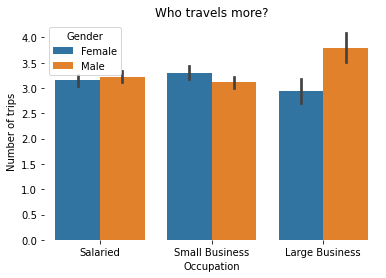

In [18]:
sns.barplot(x='Occupation', y="NumberOfTrips",
            hue = 'Gender',
             data=question1).set(title='Who travels more?',
                          xlabel = 'Occupation', ylabel = 'Number of trips')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

so I'll join Marital Status with Gender in a column and look at that by Occupation.

In [19]:
question1['GenderMaritalStatus'] = question1.MaritalStatus.str.cat(question1.Gender, sep = ' ')
question1 = question1[['Occupation','GenderMaritalStatus', 'NumberOfTrips']]
question1.head()

,Occupation,GenderMaritalStatus,NumberOfTrips
0,Salaried,Single Female,1.0
1,Salaried,Divorced Male,2.0
3,Salaried,Divorced Female,2.0
4,Small Business,Divorced Male,1.0
5,Salaried,Single Male,1.0


In [20]:
grouped = question1.groupby(['GenderMaritalStatus', 'Occupation']).mean()
grouped.sort_values('NumberOfTrips', ascending = False)

,,NumberOfTrips
GenderMaritalStatus,Occupation,
Single Male,Large Business,4.392857
Unmarried Female,Large Business,3.928571
Divorced Male,Large Business,3.851064
Divorced Female,Small Business,3.689024
Married Male,Large Business,3.643478
Married Female,Small Business,3.408269
Divorced Male,Salaried,3.348485
Married Male,Salaried,3.303965
Unmarried Male,Salaried,3.293532


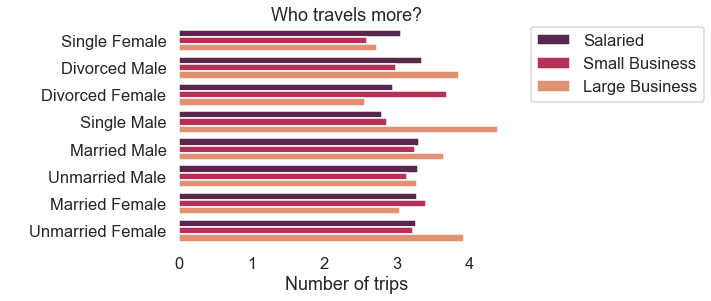

In [21]:
sns.set_theme(style="white", context="talk")
sns.barplot(x="NumberOfTrips" , y='GenderMaritalStatus',
            hue = 'Occupation',
             data=question1,
           palette="rocket",
           ci=None).set(title='Who travels more?',
                          xlabel = 'Number of trips', ylabel = ' ')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

Our answer to who travels more: Single men that work in Large Businesses!